# Explore here

In [2]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
if (df['age'] < 18).any():
    print("Hay al menos un menor de edad en la columna 'age'.")
else:
    print("No hay menores de edad en la columna 'age'.")

No hay menores de edad en la columna 'age'.


In [6]:

df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
duplicados = df[df.duplicated()]
print(duplicados)


     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [10]:
df = df.drop_duplicates()

In [11]:
#df.drop(['region'], axis=1, inplace=True)

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

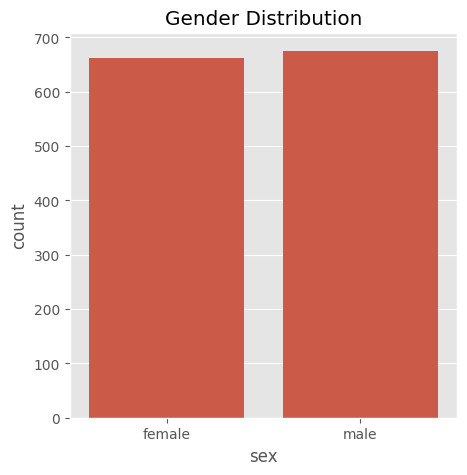

In [14]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

In [15]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


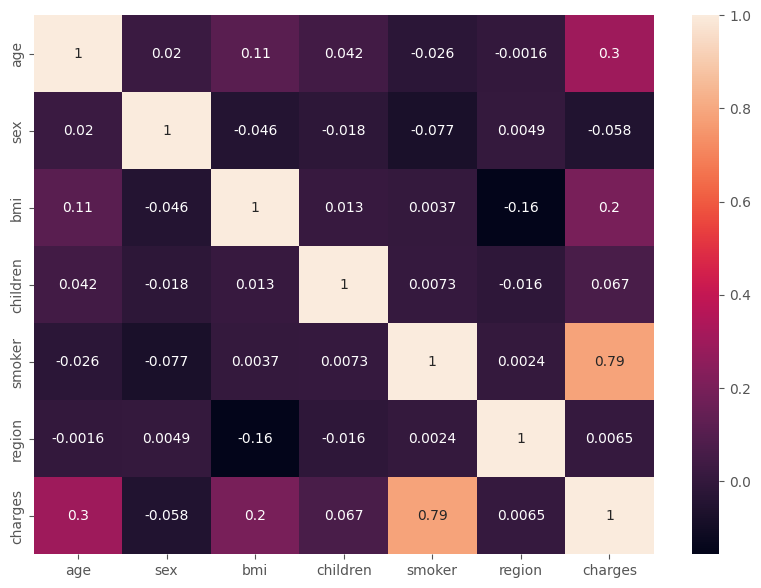

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [19]:
X = df[['age']]  # Variables predictoras
y = df['charges']

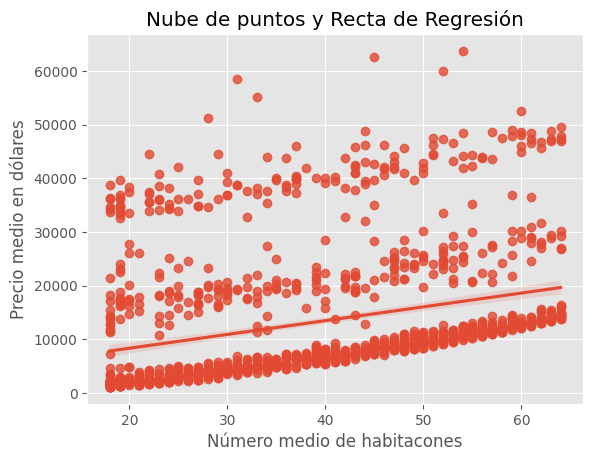

In [20]:
# Crear la nube de puntos y la recta de regresión
sns.regplot(x='age', y="charges", data=df)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Número medio de habitacones")
plt.ylabel("Precio medio en dólares")
plt.show()

In [21]:
X = df[['age', 'bmi', 'smoker']]  # Variables predictoras
y = df['charges']

In [22]:
# Crear el modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:10:53   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.167e+04    938.136    -12.441      0.0

In [23]:
residuos = results.resid

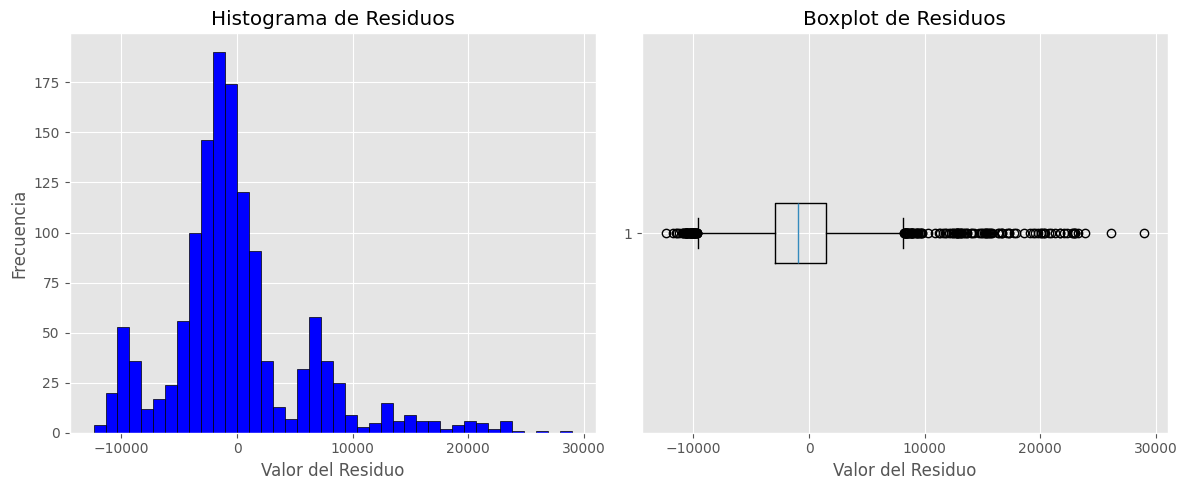

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
X_train_sm = sm.add_constant(X_train)  # Agregar constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     941.6
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          5.88e-299
Time:                        17:10:54   Log-Likelihood:                -10838.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1065   BIC:                         2.170e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.077e+04   1057.969    -10.181      0.0

In [29]:
# Nuevos datos de clientes
nuevos_clientes = pd.DataFrame({
    'age': [25, 40, 60],
    'bmi': [22.0, 28.5, 35.0],
    'smoker': [0, 1, 1]  # 0: No fuma, 1: Fuma
})

# Agregar el modelo ajustado
nuevos_clientes['charges_pred'] = (
    model.intercept_ + 
    model.coef_[0] * nuevos_clientes['age'] + 
    model.coef_[1] * nuevos_clientes['bmi'] + 
    model.coef_[2] * nuevos_clientes['smoker']
)

print(nuevos_clientes)


   age   bmi  smoker  charges_pred
0   25  22.0       0  -5229.611929
1   40  28.5       1  -3287.614219
2   60  35.0       1  -1650.419067
